In [351]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

# Задание 1
### Создание шума

In [352]:
np.random.seed(42)
n = 500
gaussian_noise = np.random.normal(0, 1, n)

### График шума

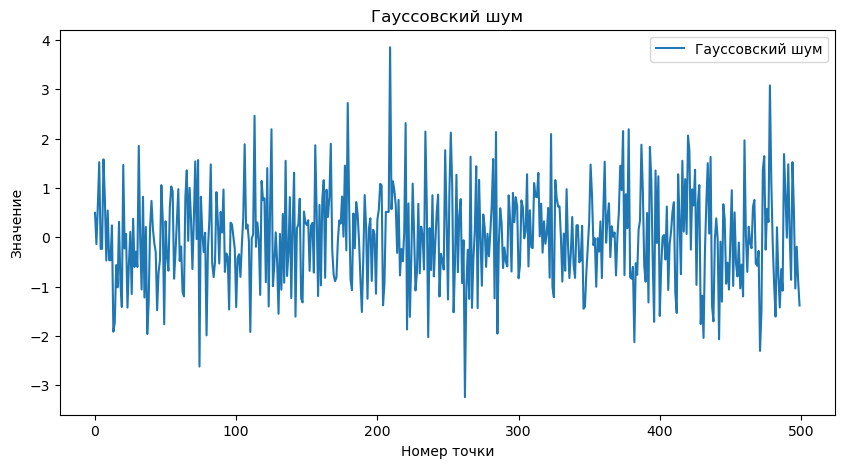

In [353]:
plt.figure(figsize=(10, 5))
plt.plot(gaussian_noise, label="Гауссовский шум")
plt.title("Гауссовский шум")
plt.xlabel("Номер точки")
plt.ylabel("Значение")
plt.legend()
plt.show()

### DF(ADF) тест для гауссовского шума

In [354]:
adf_result_noise = adfuller(gaussian_noise)
print("ADF-тест для гауссовского шума")
print(f"p-значение: {adf_result_noise[1]}")


ADF-тест для гауссовского шума
p-значение: 0.0


p-value < a(0.05) => ряд стационарный
# Задание 2
### Добавляем тренд к шуму

In [355]:
trend = 0.001 * np.arange(n)
noisy_trend = gaussian_noise + trend

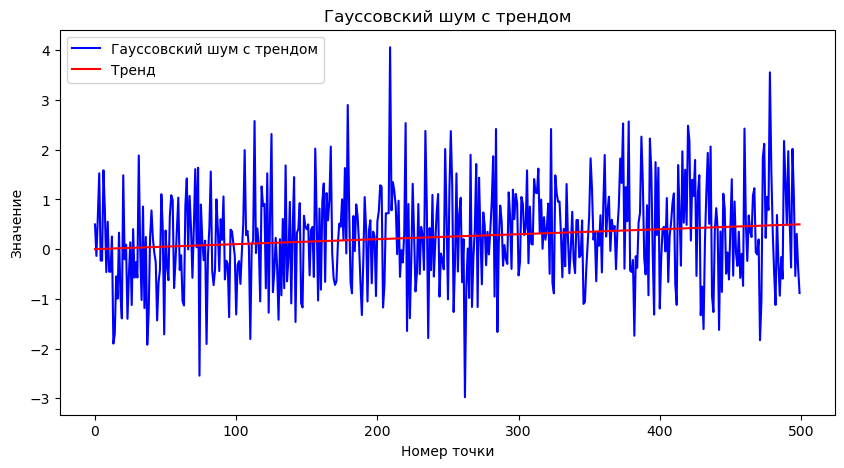

In [356]:
plt.figure(figsize=(10, 5))
plt.plot(noisy_trend, label="Гауссовский шум с трендом", color="blue")
plt.plot(trend, label="Тренд", color="red")
plt.title("Гауссовский шум с трендом")
plt.xlabel("Номер точки")
plt.ylabel("Значение")
plt.legend()
plt.show()

In [357]:
adf_result_noisy_trend = adfuller(noisy_trend)
print("ADF-тест для гауссовского шума с трендом")
print(f"p-значение: {adf_result_noisy_trend[1]}")

ADF-тест для гауссовского шума с трендом
p-значение: 0.0


### Тренд 0.001 слишком незначителен, я увкличу его до 0.005

In [358]:
trend = 0.005 * np.arange(n)
noisy_trend = gaussian_noise + trend

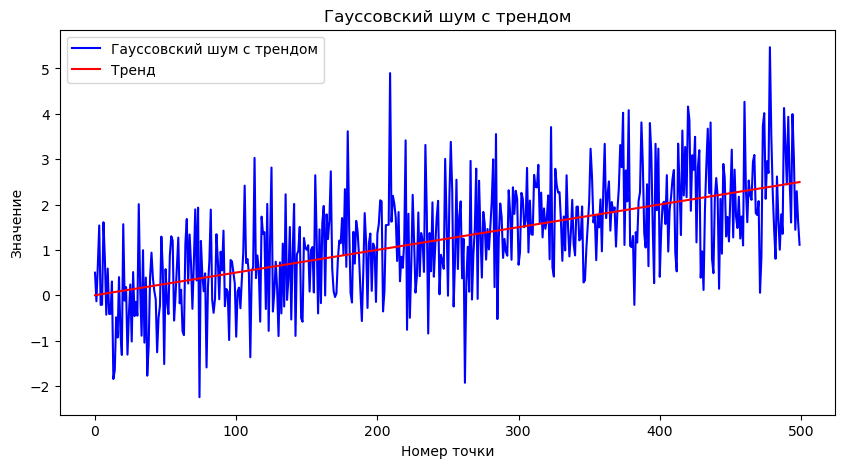

In [359]:
plt.figure(figsize=(10, 5))
plt.plot(noisy_trend, label="Гауссовский шум с трендом", color="blue")
plt.plot(trend, label="Тренд", color="red")
plt.title("Гауссовский шум с трендом")
plt.xlabel("Номер точки")
plt.ylabel("Значение")
plt.legend()
plt.show()

In [360]:
adf_result_noisy_trend = adfuller(noisy_trend)
print("ADF-тест для гауссовского шума с трендом")
print(f"p-значение: {adf_result_noisy_trend[1]}")

ADF-тест для гауссовского шума с трендом
p-значение: 0.40633995645551807


Тренд в 0.005х уже замечен df тестом и ряд уже точно не стационарный
# Задание 3

In [361]:
df = pd.read_csv('passengers.csv')
df

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


### Разделяю исходный датасет на 3 части (и возвращаю везде индексы к подсчёту с 0)

In [362]:
dfs = [i.reset_index(drop=True) for i in np.array_split(df, 3)]

/opt/anaconda3/lib/python3.12/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [363]:
for df in dfs:
    print(df['#Passengers'].mean(), df['#Passengers'].var())

158.375 1094.6648936170213
269.0416666666667 3105.9982269503544
413.4791666666667 6161.999556737589


### Ряд не стационарный, так как все его параметры растут, к тому же с относительно одинаковой скоростью

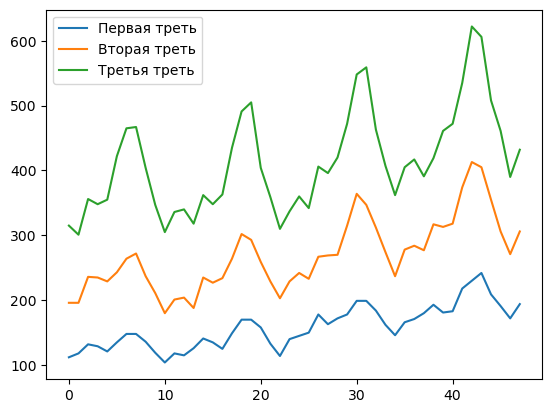

In [364]:
plt.plot(dfs[0]['#Passengers'], label='Первая треть')
plt.plot(dfs[1]['#Passengers'], label='Вторая треть')
plt.plot(dfs[2]['#Passengers'], label='Третья треть')
plt.legend()

In [365]:
for df in dfs:
    df['#Passengers'] = df['#Passengers'].apply(np.log)

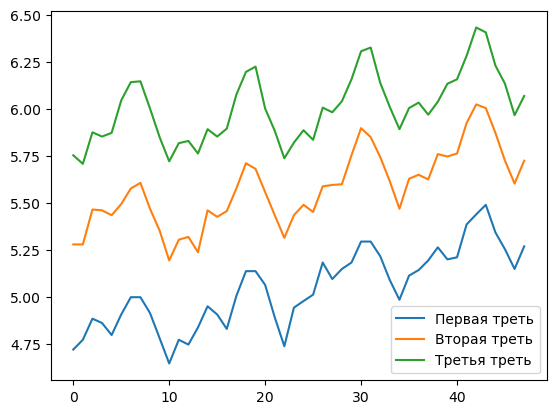

In [366]:
plt.plot(dfs[0]['#Passengers'], label='Первая треть')
plt.plot(dfs[1]['#Passengers'], label='Вторая треть')
plt.plot(dfs[2]['#Passengers'], label='Третья треть')
plt.legend()

In [367]:
for df in dfs:
    print(df['#Passengers'].mean(), df['#Passengers'].var())

5.0439107377437 0.04290111741091088
5.574732792583696 0.04051159084053209
6.007884345268219 0.033399648158998464


### Теперь тренд виден ещё лучше, так как рост среднего идёт ровно по 0.5, а дисперсия почти не меняется

In [368]:
adf_df = adfuller(df['#Passengers'])
print("ADF-тест для гауссовского шума")
print(f"p-значение: {adf_df[1]}")

ADF-тест для гауссовского шума
p-значение: 0.9940153057426722


In [369]:
adf_df = adfuller(df['#Passengers'].apply(np.log))
print("ADF-тест для гауссовского шума")
print(f"p-значение: {adf_df[1]}")

ADF-тест для гауссовского шума
p-значение: 0.993532474191773


### Оба варианта датасета показали наличие тренда по df тесту